In [1]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ROSMAP_PATH = 'ROSMAP_clinical.csv'
CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ROSMAP_data = pd.read_csv(ROSMAP_PATH)
ct_counts_metadata: ad.AnnData = ad.read_h5ad(CT_COUNTS_META_PATH)

ROSMAP_data = ROSMAP_data.convert_dtypes()
ct_counts_metadata.obs = ct_counts_metadata.obs.convert_dtypes()

In [2]:
ct_counts_metadata

AnnData object with n_obs × n_vars = 427 × 54
    obs: 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'projid'

In [3]:
# Plots

def generate_boxplot_old(adata: ad.AnnData, layer: str) -> None:
    col_labels = ct_counts_metadata.var_names

    if layer == 'X':
        _df = pd.DataFrame(adata.X, columns=col_labels)
    else:
        _df = pd.DataFrame(adata.layers[layer], columns=col_labels)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
    bplot = ax.boxplot(_df, notch=True, labels=col_labels)
    plt.xticks(rotation=90)
    ax.set_title(f'Box Plot for {layer}')
    fig.show()
    del(_df)

def generate_boxplot(adata: ad.AnnData, layer: str) -> None:
    col_labels = ct_counts_metadata.var_names

    if layer == 'X':
        _df = pd.DataFrame(adata.X, columns=col_labels)
    else:
        _df = pd.DataFrame(adata.layers[layer], columns=col_labels)
    ax = sns.boxplot(_df, orient='v', notch=True)
    plt.xticks(rotation=90)
    ax.set_title(f'Box Plot for {layer}')
    plt.show()
    del(_df)

def generate_densityplot(adata: ad.AnnData, layer: str, show_legend:bool=False) -> None:
    col_labels = ct_counts_metadata.var_names

    if layer == 'X':
        _df = pd.DataFrame(adata.X, columns=col_labels)
    else:
        _df = pd.DataFrame(adata.layers[layer], columns=col_labels)
    sns.set_style('whitegrid')
    density = sns.kdeplot(_df, bw_method=0.5)
    density.set_title(f'Density Plot for {layer}')
    if not show_legend:
        density.legend(handles=None)
    else:
        density.figure.set_size_inches(16, 16)
    plt.show()
    del(_df)

def generate_clustermap(adata: ad.AnnData, layer: str) -> None:
    col_labels = ct_counts_metadata.var_names

    if layer == 'X':
        _df = pd.DataFrame(adata.X, columns=col_labels)
    else:
        _df = pd.DataFrame(adata.layers[layer], columns=col_labels)
    sns.clustermap(_df)
    plt.title(f'Clustermap for {layer}')
    plt.show()
    del(_df)

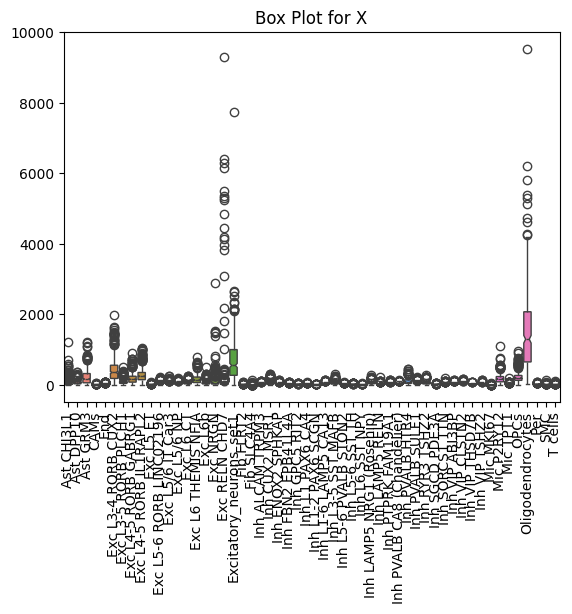

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


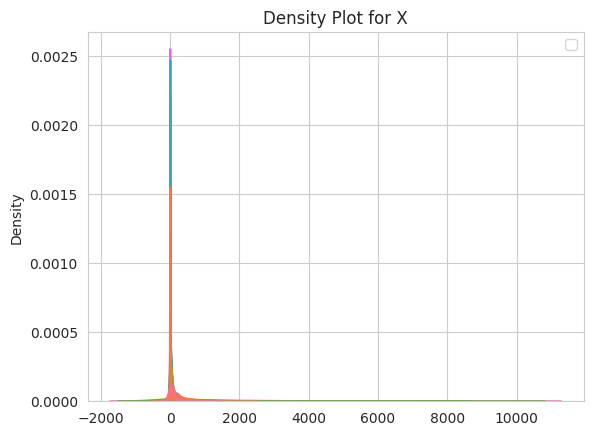

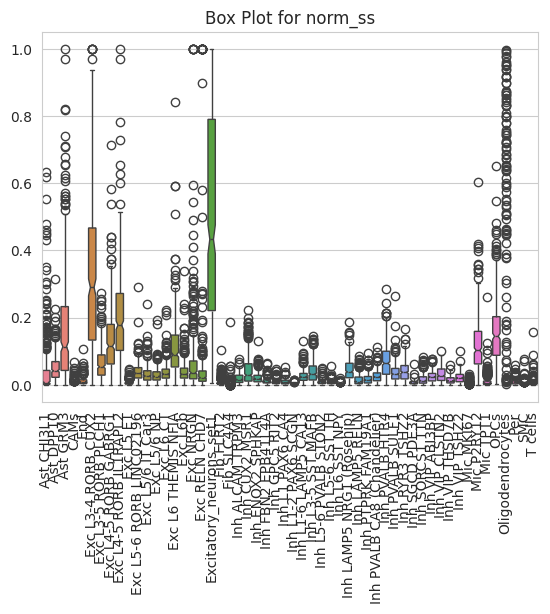

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


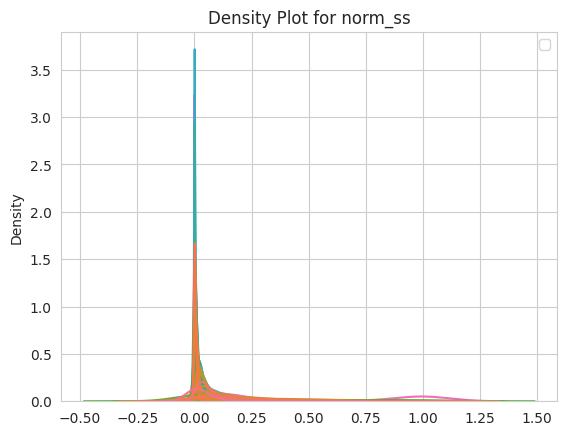

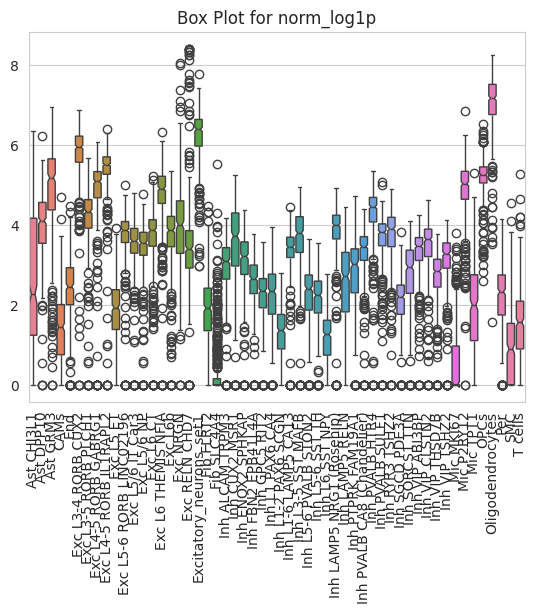

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


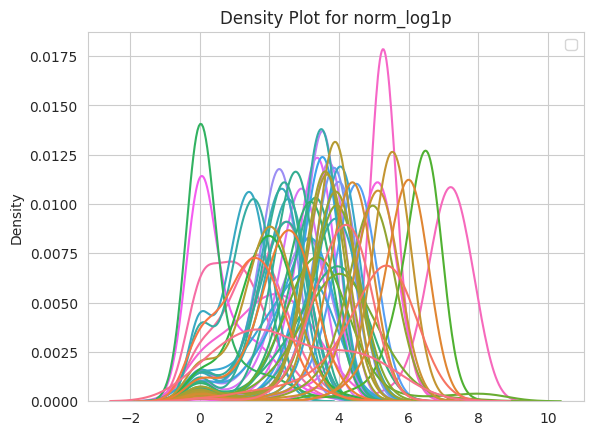

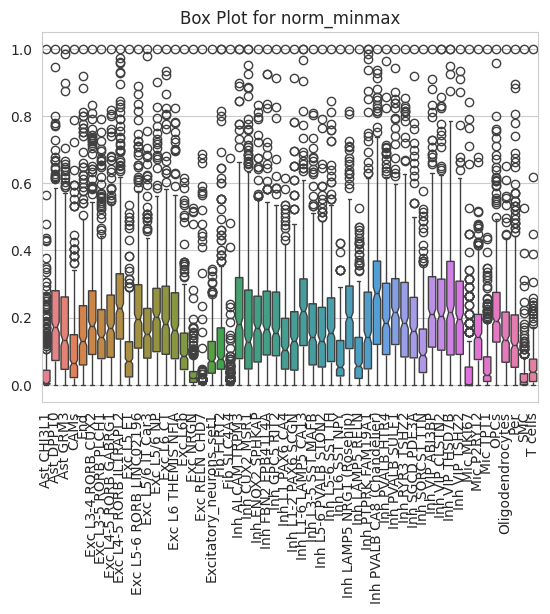

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


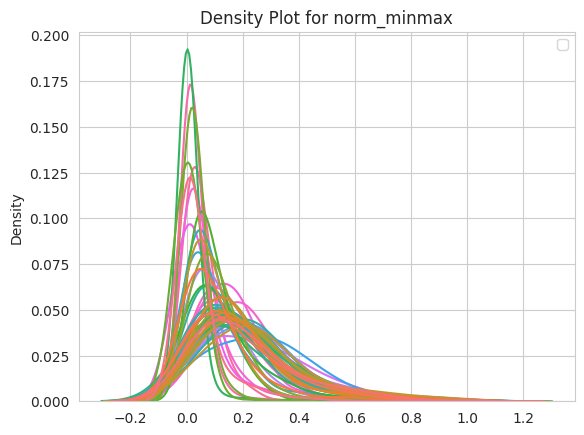

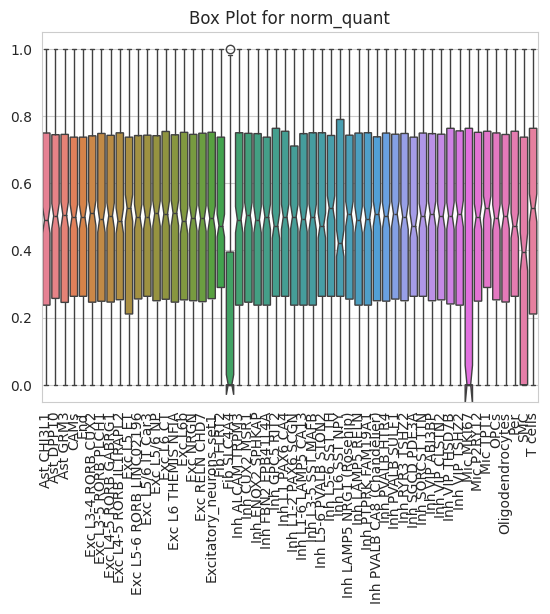

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


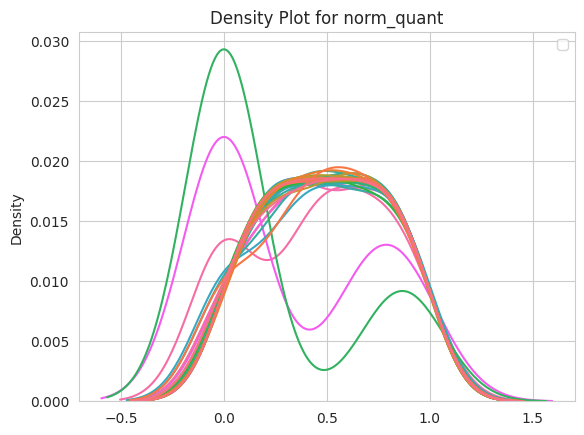

In [4]:
# Normalizations

from normalize import *

normalizations: list[tuple] = [(normalize_unit, 'norm_ss'), 
                               (normalize_log1p, 'norm_log1p'),
                               (normalize_minmax, 'norm_minmax'), 
                               (normalize_quantile, 'norm_quant')]

generate_boxplot(ct_counts_metadata, 'X')
generate_densityplot(ct_counts_metadata, 'X')

for func, layer in normalizations:
    func(ct_counts_metadata, layer)

    generate_boxplot(ct_counts_metadata, layer)
    generate_densityplot(ct_counts_metadata, layer)